In [1]:
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Read The Data

In [2]:
df = pd.read_csv(r'C:\Users\dell\Downloads\portfolio\PYTHON PROJECTS\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Understand The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.shape

(10841, 13)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Cleaning The Data

In [7]:
## Check For Missing Values

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

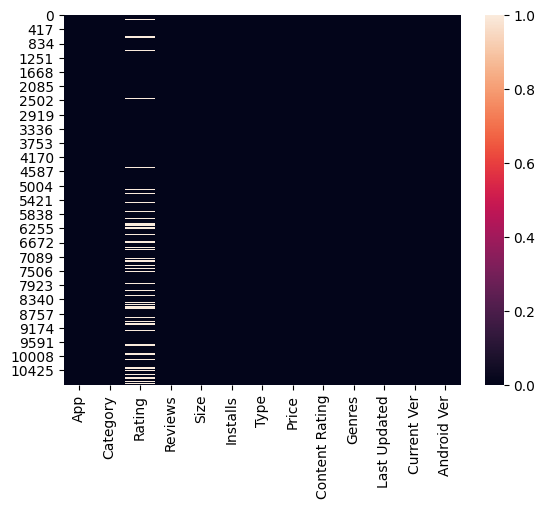

In [9]:
sns.heatmap(df.isnull())

In [ ]:
## most null values in rating column 
## so we going to remove nulls

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<AxesSubplot:>

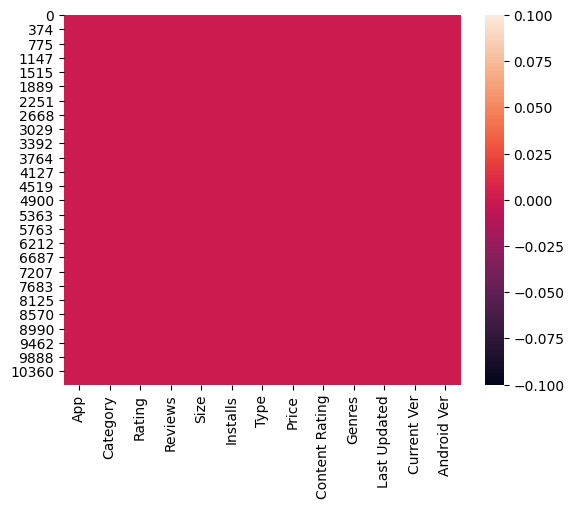

In [12]:
sns.heatmap(df.isnull())

In [13]:
## Checking For Duplicates

In [14]:
df.duplicated().sum()

474

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [18]:
# remove any rows' Type is not Free or Paid
df[(df['Type']!='Free')  & (df['Type']!='Paid')] 
df = df.drop(df[(df['Type']!='Free')  & (df['Type']!='Paid')].index)

In [19]:
## Data Types

In [20]:
# converting insatll and price columns to float 
# and by doing this we have to remove some chareters ('$','+',',')

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [23]:
col_to_clean = ['Installs','Price']
char_to_remove = ('+',',','$')
## looping in col to remove chars
for col in col_to_clean:
    for char in char_to_remove:
        df[col] = df[col].apply(lambda x : x.replace(char, ''))

In [24]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [25]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [26]:
df['Installs'] = df['Installs'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Reviews'] = df['Reviews'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int32  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   float64
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 937.2+ KB


## Data Analysis And Visualisation

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068724,0.050869,-0.022371
Reviews,0.068724,1.000000,0.633422,-0.009562
Installs,0.050869,0.633422,1.000000,-0.011334
Price,-0.022371,-0.009562,-0.011334,1.000000


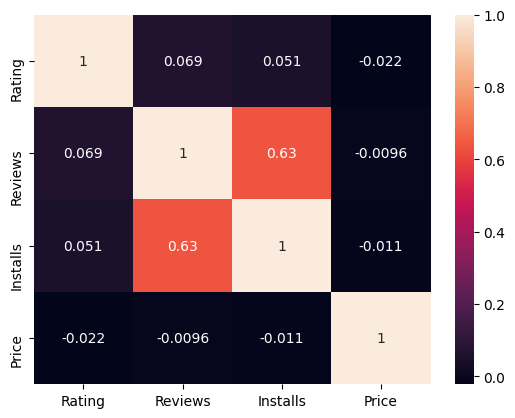

In [30]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
## Size

In [32]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [33]:
## converting size column to float dtype
## first we need to removing 'm' for mp and 'k' and 'Varies with device'

In [34]:
df['Size'] = df['Size'].str.replace('M' , '')
df['Size'] = df['Size'].str.replace('Varies with device' , '1')

In [35]:
df['Size'] = df['Size'].apply(lambda x : str(round((float(x.rstrip('k'))/1024),1)) if
x[-1] == 'k' else x)

In [36]:
df['Size'] = df['Size'].astype(float)

In [37]:
df['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   5.5,  17. ,  39. ,  31. ,
         4.2,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,  11. ,  24. ,
         1. ,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,   7.9,  56. ,
        57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,   2.4,  27. ,
         2.7,   2.5,   7. ,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,  22. ,   6.4,   3.2,   8.2,   4.9,
         9.5,   5. ,   5.9,  13. ,  73. ,   6.8,   3.5,   4. ,   2.3,
         2.1,  42. ,   9.1,  55. ,   0. ,   7.3,   6.5,   1.5,   7.5,
        51. ,  41. ,  48. ,   8.5,  46. ,   8.3,   4.3,   4.7,   3.3,
        40. ,   7.8,   8.8,   6.6,   5.1,  61. ,  66. ,   0.1,   8.4,
         3.7,  44. ,   0.7,   1.6,   6.2,  53. ,   1.4,   3. ,   7.2,
         5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,   4.4,  70. ,
         9.3,   8.1,

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
## category vs rating
## let see what is the most category ratings in store

Text(0.5, 1.0, 'Category vs Rating')

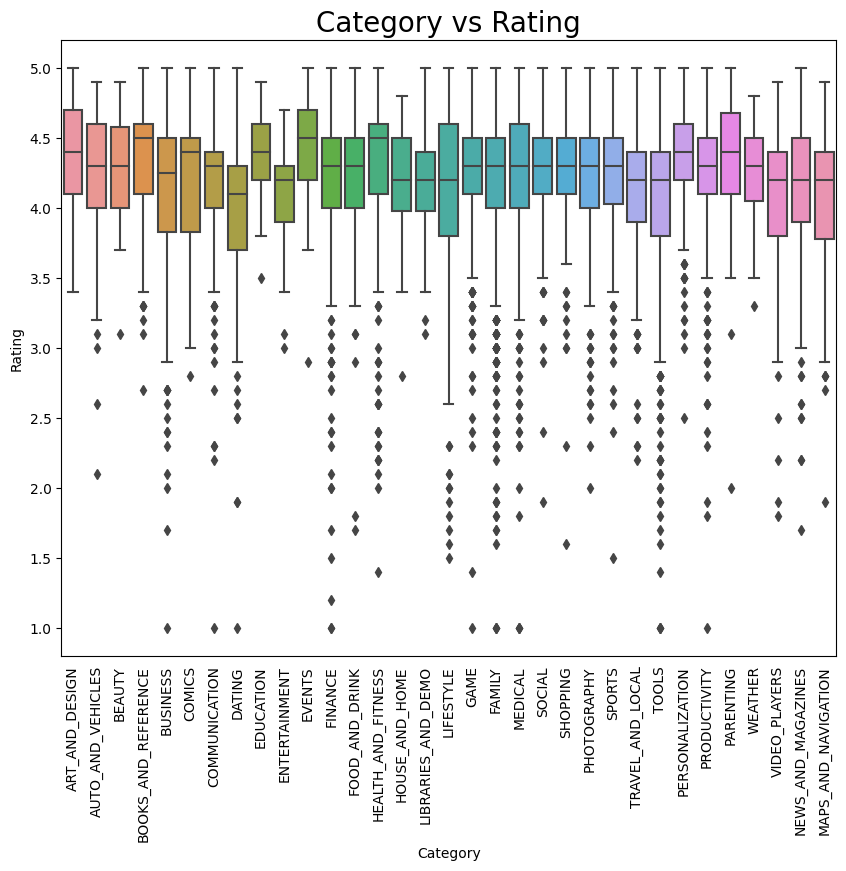

In [40]:
plt.figure(figsize=(10,8))
ax =sns.boxplot(data=df , x='Category',y='Rating')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(bottom=False)
ax.set_title('Category vs Rating',fontsize=20)

In [41]:
## It seems that there is not much difference in the rating between categorys

In [ ]:
## Let's see what the different rating rates are

In [42]:
a = df['Rating'].unique()
print(sorted(a))

[1.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [43]:
## What are the most highly rated categories? 4.7 , 4.8 , 4.9 , 5.0

In [44]:
df_rating = df[df['Rating']>= 4.7]
df_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5,500000.0,Free,0.0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2,500000.0,Free,0.0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23.0,50000.0,Free,0.0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24.0,1000000.0,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up
10810,Fr Lupupa Sermons,BUSINESS,4.8,19,21.0,100.0,Free,0.0,Everyone,Business,"June 12, 2018",1.0,4.4 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000.0,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,1000.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up


In [45]:
df_rating.groupby(['Category','Rating'])['Rating'].count()

Category           Rating
ART_AND_DESIGN     4.7       13
                   4.8        5
                   5.0        1
AUTO_AND_VEHICLES  4.8        5
                   4.9        5
                             ..
VIDEO_PLAYERS      4.7        6
                   4.8        6
                   4.9        1
WEATHER            4.7        3
                   4.8        3
Name: Rating, Length: 111, dtype: int64

Text(0.5, 1.0, 'Categorys Rating')

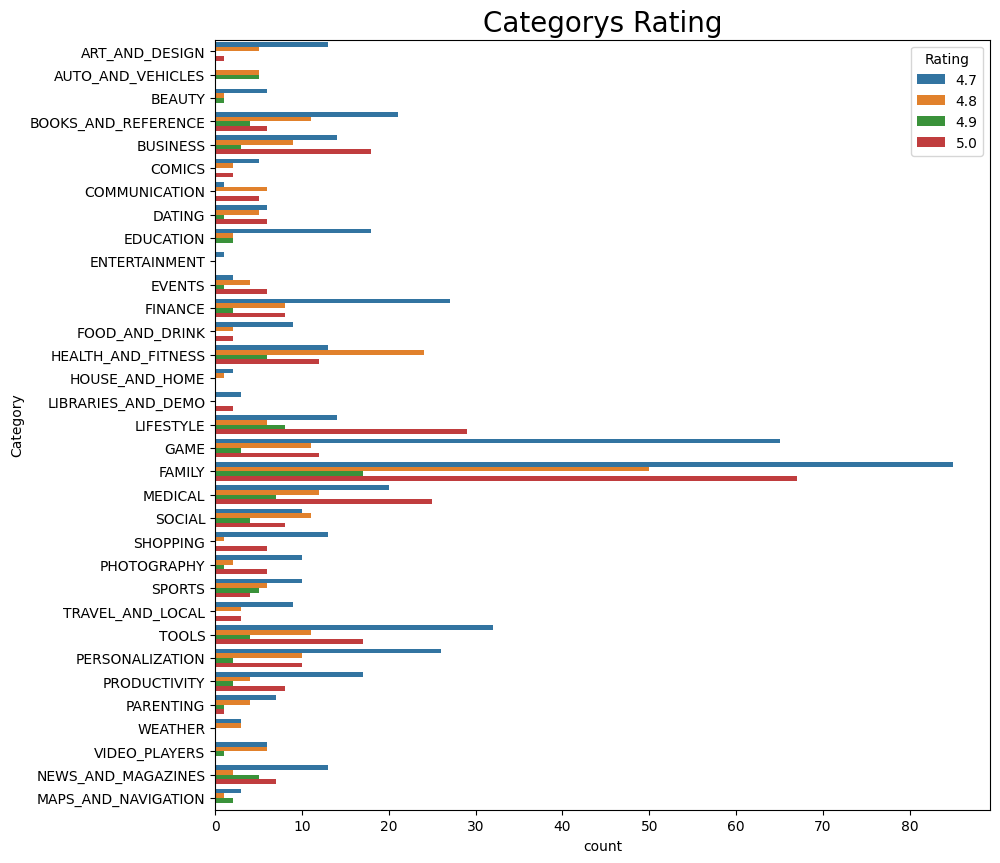

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_rating, y="Category", hue="Rating")
plt.title('Categorys Rating',fontsize=20)

In [49]:
## It is clear that family apps have the highest ratings among all the apps
## Why is that ??

In [50]:
df.groupby(['Category'])['Category'].count().sort_values(ascending=False) ## that is why

Category
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [51]:
## App vs Rating

In [52]:
## what is the top 5 apps ratings(5.0) and reviews on the store

In [53]:
df_apps_5 = df[df['Rating']==5.0]
df_top_Rev = df_apps_5.sort_values(by=['Reviews'],ascending=False).head(5)
df_top_Rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10357,Ríos de Fe,LIFESTYLE,5.0,141,15.0,1000.0,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2.3,1000.0,Free,0.0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up
8058,Oración CX,LIFESTYLE,5.0,103,3.8,5000.0,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100,10.0,1000.0,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
9496,Master E.K,FAMILY,5.0,90,1.0,1000.0,Free,0.0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up


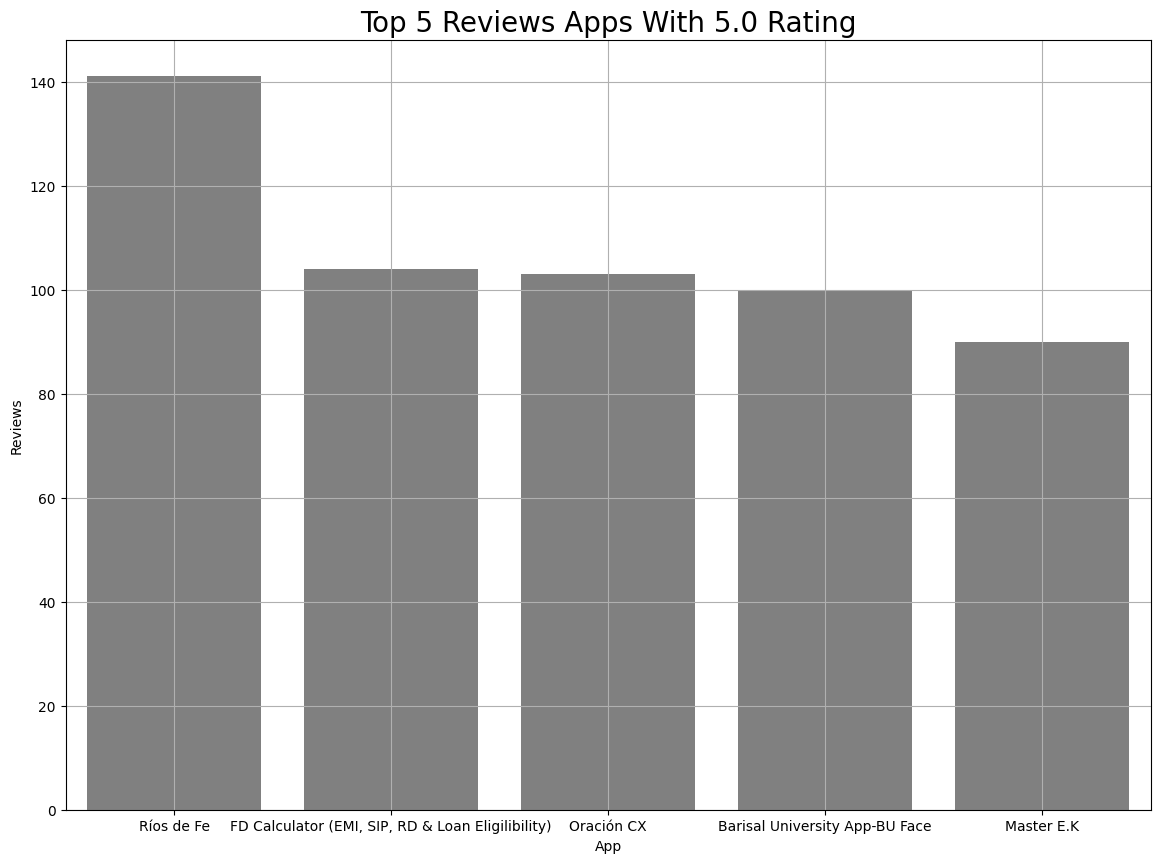

In [54]:
plt.figure(figsize=(14,10))
sns.barplot(x="App", y="Reviews", data=df_top_Rev,
            label="App", color="grey")
plt.title('Top 5 Reviews Apps With 5.0 Rating',fontsize=20)
plt.grid()

In [55]:
## Rating VS Install 

In [56]:
## Does the high installs times of the application increase the rating ?

In [57]:
df_install = df_rating[df_rating['Installs']>=1000000]
df_install

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24.0,10000000.0,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35.0,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38.0,1000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14.0,1000000.0,Free,0.0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Amino: Communities and Chats,SOCIAL,4.8,1264084,62.0,10000000.0,Free,0.0,Teen,Social,"August 7, 2018",1.8.19179,4.0.3 and up
9859,Offline Maps & Navigation,TRAVEL_AND_LOCAL,4.7,193364,33.0,5000000.0,Free,0.0,Everyone,Travel & Local,"June 7, 2018",17.4.1,4.0.3 and up
9975,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,432160,15.0,10000000.0,Free,0.0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000.0,Free,0.0,Everyone,Tools,"July 26, 2018",1.9.734,4.1 and up


In [58]:
df_gr = df_install.groupby(['Installs','Rating'])['Rating'].count().sort_values(ascending=False)
df_gr

Installs     Rating
10000000.0   4.7       69
1000000.0    4.7       66
             4.8       30
5000000.0    4.7       25
10000000.0   4.8       24
50000000.0   4.7       16
100000000.0  4.7        9
1000000.0    4.9        6
10000000.0   4.9        3
500000000.0  4.7        2
5000000.0    4.8        1
             4.9        1
50000000.0   4.8        1
100000000.0  4.8        1
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Installs,Rating'>

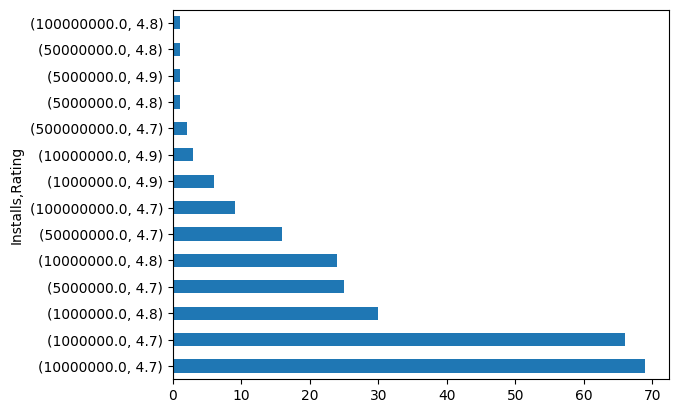

In [59]:
df_gr.plot(kind='barh')

In [60]:
## It is not necessary to increase the rating when the installs is high

In [61]:
## creating column with size group

In [62]:
def f(x):
     if x<=10 :
        return '-10M'
     elif x>10 and x<=30 :
        return '10-30M'
     elif x>30 and x<=50 :
        return '30-50M'
     else: 
        return '+50M'
        
df['Size_group'] = df['Size'].apply(f)

In [63]:
df['Size_group'].value_counts()

-10M      4653
10-30M    2244
30-50M    1010
+50M       979
Name: Size_group, dtype: int64

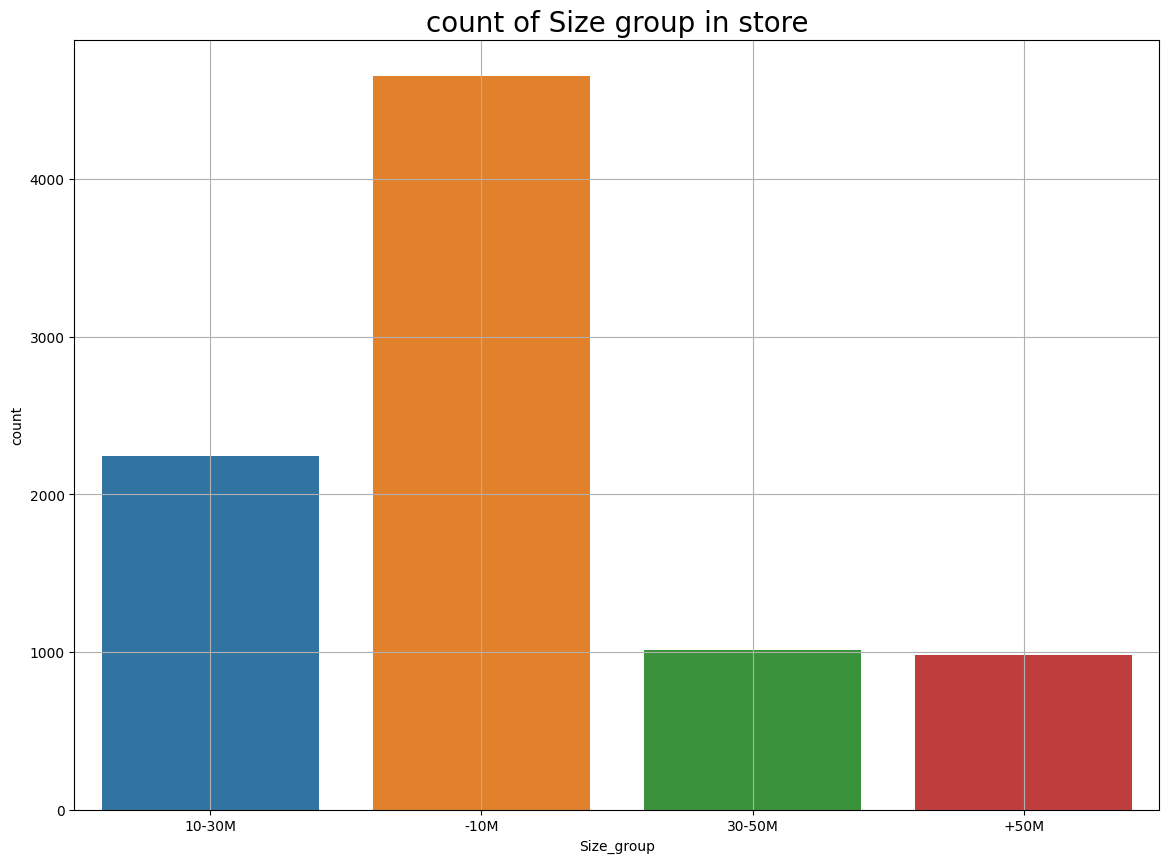

In [65]:
plt.figure(figsize=(14,10))
sns.countplot(data=df , x='Size_group')
plt.title('count of Size group in store',fontsize=20)
plt.grid()

In [66]:
## type of apps (free , paid)

<AxesSubplot:ylabel='Type'>

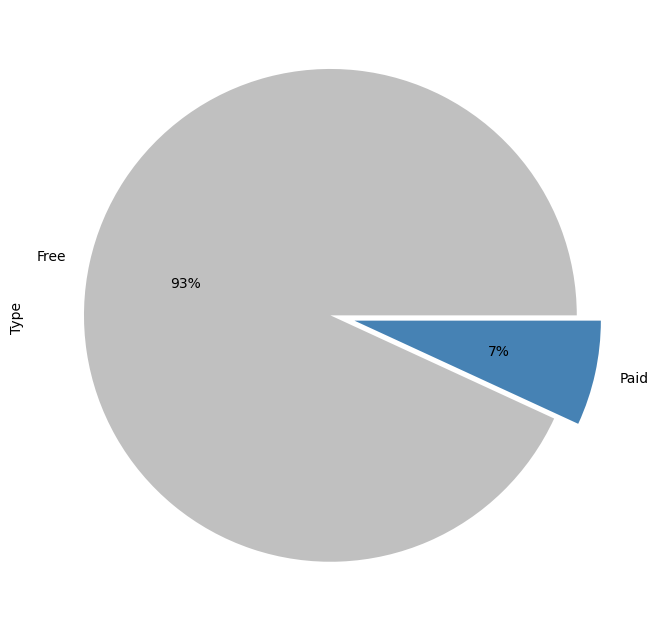

In [67]:
plt.figure(figsize=(10,8))
explode = (0.05, 0.05)
colors = ['silver', 'steelblue']
df['Type'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=colors,explode=explode)

In [68]:
## What are the top 5 paid apps with the highest reviews?

In [69]:
df_re_paid = df[df['Type']=='Paid'].sort_values(by='Reviews',ascending=False).head(7)
df_re_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group
2241,Minecraft,FAMILY,4.5,2376564,1.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,-10M
4347,Minecraft,FAMILY,4.5,2375336,1.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,-10M
4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10-30M
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,10-30M
8860,Bloons TD 5,FAMILY,4.6,190086,94.0,1000000.0,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,+50M
9678,Where's My Water?,FAMILY,4.7,188740,69.0,1000000.0,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,+50M
2242,Card Wars - Adventure Time,FAMILY,4.3,129603,23.0,1000000.0,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,10-30M


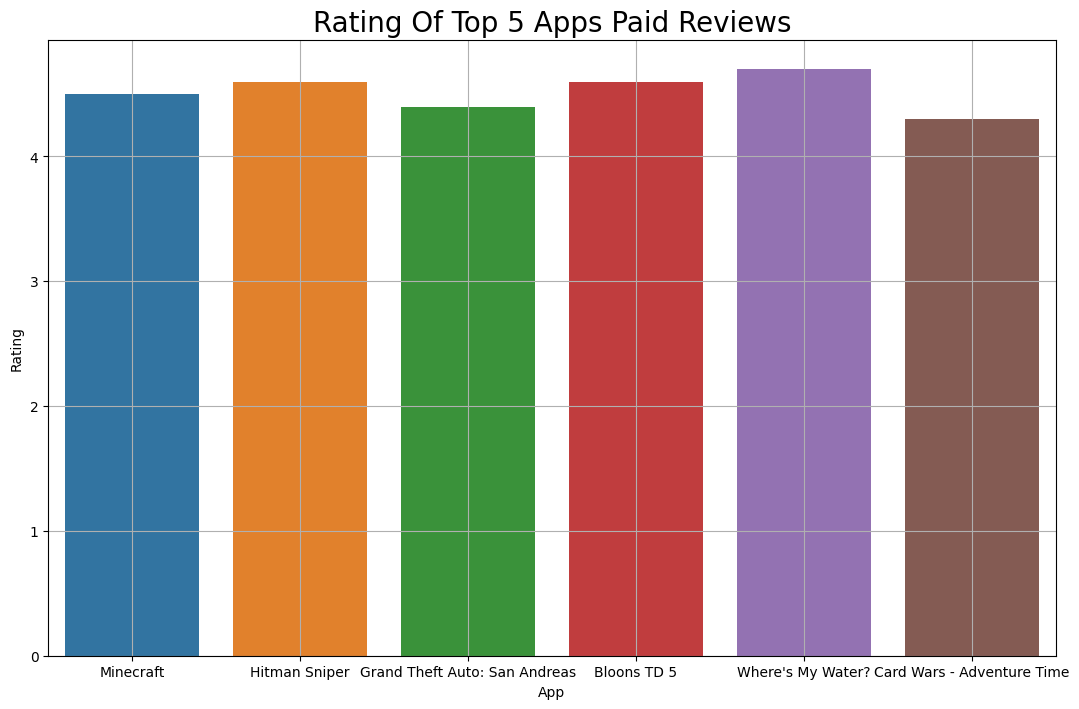

In [70]:
plt.figure(figsize=(13,8))
sns.barplot(data = df_re_paid , x='App',y='Rating')
plt.title('Rating Of Top 5 Apps Paid Reviews',fontsize=20)
plt.grid()

In [71]:
## most highest price of apps

In [72]:
df.sort_values(by='Price',ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,-10M
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,-10M
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up,30-50M
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,-10M
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,-10M
5358,I am Rich!,FINANCE,3.8,93,22.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,10-30M
5359,I am rich(premium),FINANCE,3.5,472,0.9,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,-10M
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10-30M
4197,most expensive app (H),FAMILY,4.3,6,1.5,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,-10M
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,-10M


In [73]:
## Price

Text(0.5, 1.0, 'Top 15 Highest Apps Price')

<Figure size 2000x1000 with 0 Axes>

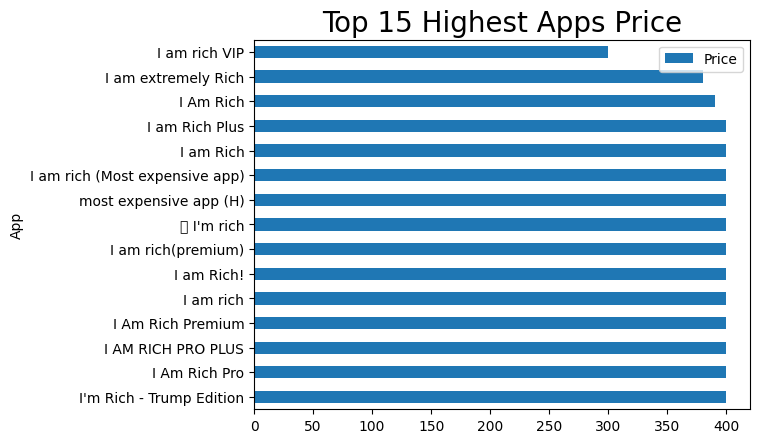

In [75]:
plt.figure(figsize=(20,10))
df.sort_values(by='Price',ascending=False).head(15).plot(kind='barh',x='App',y='Price')
plt.title('Top 15 Highest Apps Price',fontsize=20)

In [76]:
## What are the most genres installed apps in the store?

Text(0.5, 1.0, 'Most Genres Apps Installed')

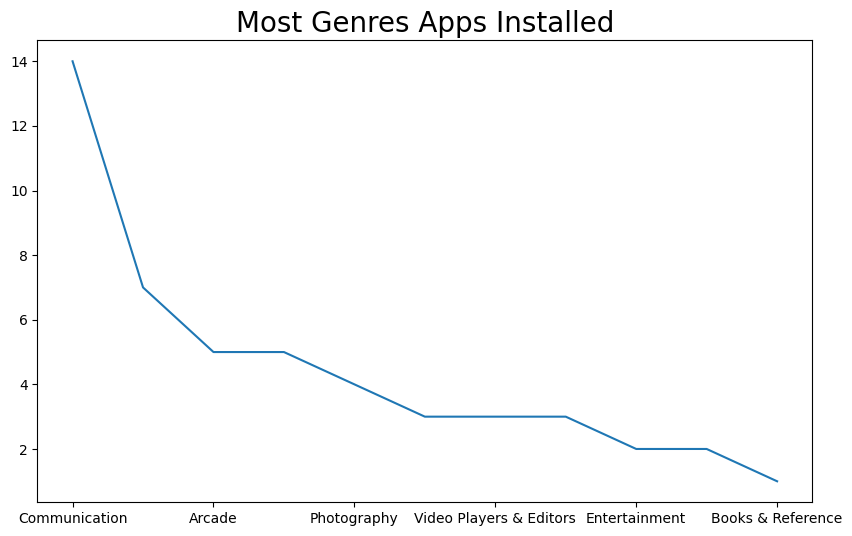

In [77]:
plt.figure(figsize=(10,6))
df_ins = df[df['Installs']>=1000000000.0]
df_ins['Genres'].value_counts().plot()
plt.title('Most Genres Apps Installed',fontsize=20)

In [78]:
## These applications have the highest installs number in the store (1000000000)
## and Not the highest in terms of total installs
## so communications apps is most apps installed in the store 

In [79]:
## so lets find what is total highest number of apps in the store 

<AxesSubplot:xlabel='Genres'>

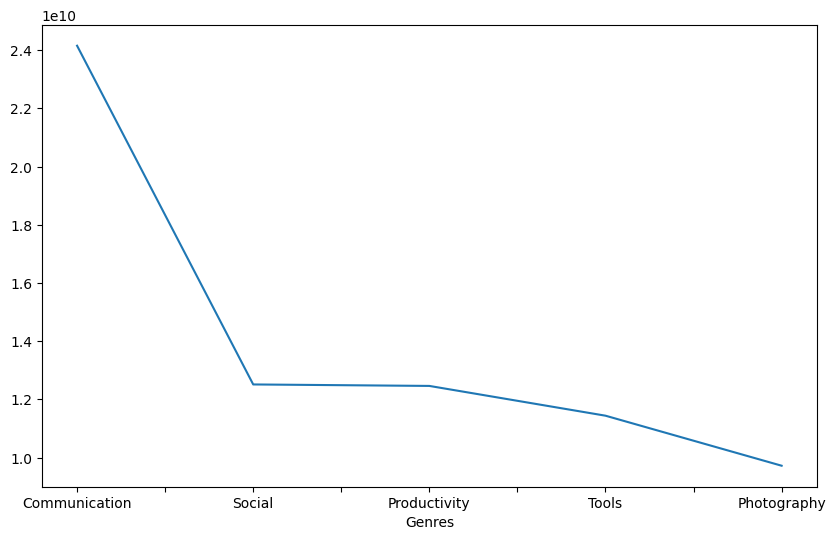

In [80]:
plt.figure(figsize=(10,6))
df.groupby(['Genres'])['Installs'].sum().sort_values(ascending=False).head(5).plot()

In [81]:
## It is clear that communication applications dominate the install percentage in the store

In [82]:
df.sort_values(by=['Size','Installs'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,+50M
1988,Hungry Shark Evolution,GAME,4.5,6074627,100.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,+50M
3973,Hungry Shark Evolution,GAME,4.5,6071542,100.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,+50M
7404,SimCity BuildIt,FAMILY,4.5,4218587,100.0,50000000.0,Free,0.0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up,+50M
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000.0,Free,0.0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up,+50M
5427,Ultimate Tennis,SPORTS,4.3,183004,100.0,10000000.0,Free,0.0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up,+50M
5862,Miami crime simulator,GAME,4.0,254518,100.0,10000000.0,Free,0.0,Mature 17+,Action,"July 9, 2018",2.0,4.0 and up,+50M
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,10000000.0,Free,0.0,Mature 17+,Simulation,"May 31, 2018",2.1,4.0 and up,+50M
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,5000000.0,Free,0.0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up,+50M
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,5000000.0,Free,0.0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up,+50M


In [83]:
## Games apps

In [84]:
## Top 5 Gameing Apps Reviews  
df_game =df[df['Category']=='GAME'].nlargest(20,'Reviews')
df_game = df_game.drop_duplicates(subset='App',keep='first')
df_game

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,+50M
1872,Subway Surfers,GAME,4.5,27725352,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,+50M
1878,Clash Royale,GAME,4.6,23136735,97.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,+50M
1869,Candy Crush Saga,GAME,4.4,22430188,74.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,+50M
1908,My Talking Tom,GAME,4.5,14892469,1.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,-10M
1871,8 Ball Pool,GAME,4.5,14201891,52.0,1.000000e+08,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,+50M


<Figure size 1000x600 with 0 Axes>

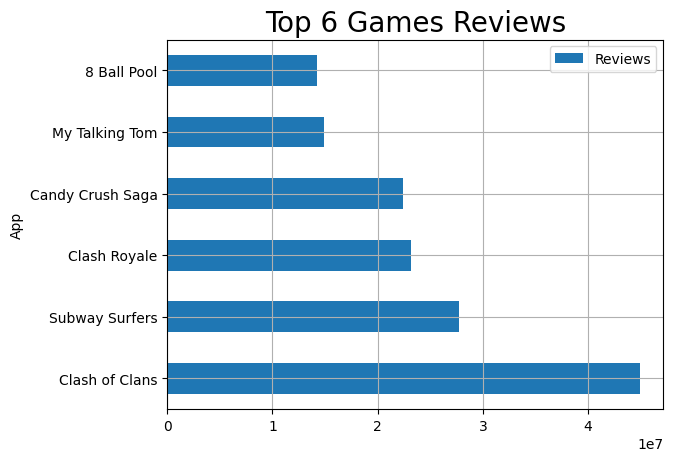

In [85]:
plt.figure(figsize=(10,6))
df_gam_gr = df_game[['App','Reviews']].set_index('App')
df_gam_gr.plot(kind='barh')
plt.title('Top 6 Games Reviews',fontsize=20)
plt.grid()